# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key,geoapify_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(city)
print(f"Number of cities in the list: {len(cities)}")

ormara
Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | mancio lima
Processing Record 5 of Set 1 | warmbad
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kormilovka
Processing Record 9 of Set 1 | hassi messaoud
Processing Record 10 of Set 1 | nagqu
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | nabire
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ryazan'
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | thayetmyo
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | santa terezinha
Processing Record 21 of Set 1 | rikaze
Processing Record 22 of Set 1 | idri
Processing Record 23 of S

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,17.48,68,0,0.45,US,1726239032
1,bethel,41.3712,-73.4140,23.97,79,6,1.15,US,1726239029
2,isafjordur,66.0755,-23.1240,7.02,61,0,1.54,IS,1726239032
3,mancio lima,-7.6142,-72.8958,30.04,70,12,1.54,BR,1726239033
4,warmbad,-28.4500,18.7333,26.12,9,2,4.16,NA,1726239033


In [12]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,17.48,68,0,0.45,US,2024-09-13
1,bethel,41.3712,-73.4140,23.97,79,6,1.15,US,2024-09-13
2,isafjordur,66.0755,-23.1240,7.02,61,0,1.54,IS,2024-09-13
3,mancio lima,-7.6142,-72.8958,30.04,70,12,1.54,BR,2024-09-13
4,warmbad,-28.4500,18.7333,26.12,9,2,4.16,NA,2024-09-13


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,17.48,68,0,0.45,US,2024-09-13
1,bethel,41.3712,-73.4140,23.97,79,6,1.15,US,2024-09-13
2,isafjordur,66.0755,-23.1240,7.02,61,0,1.54,IS,2024-09-13
3,mancio lima,-7.6142,-72.8958,30.04,70,12,1.54,BR,2024-09-13
4,warmbad,-28.4500,18.7333,26.12,9,2,4.16,NaN,2024-09-13


### Create the Scatter Plots Requested



 ### Latitude Vs. Temperature



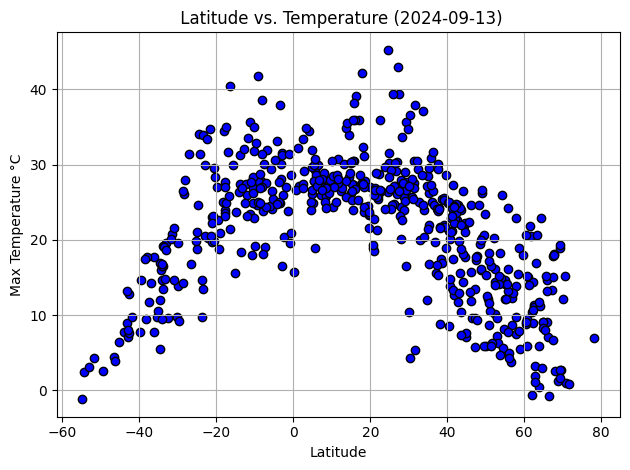

In [29]:
 #Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f" Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

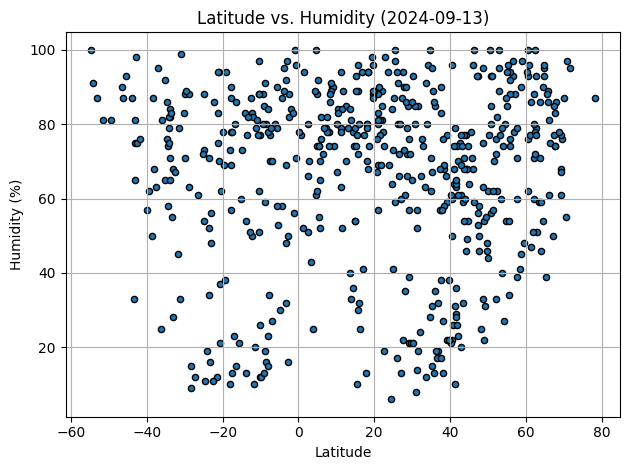

In [30]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

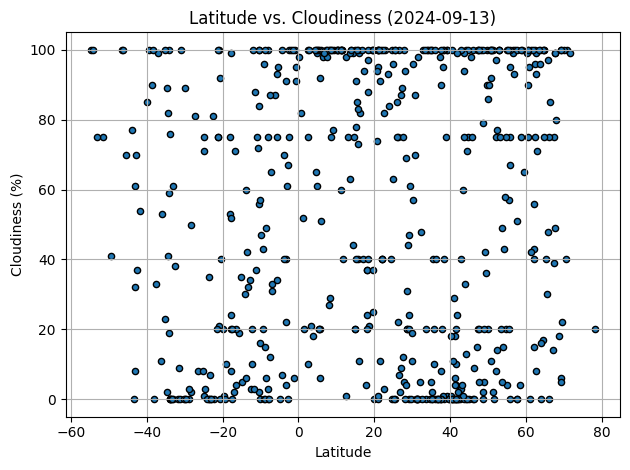

In [31]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

### Requirement 2: Compute Linear Regression for Each Relationship

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,17.48,68,0,0.45,US,2024-09-13
1,bethel,41.3712,-73.4140,23.97,79,6,1.15,US,2024-09-13
2,isafjordur,66.0755,-23.1240,7.02,61,0,1.54,IS,2024-09-13
7,kormilovka,55.0026,74.1028,14.16,85,4,3.94,RU,2024-09-13
8,hassi messaoud,31.6804,6.0729,37.92,19,0,2.06,DZ,2024-09-13


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mancio lima,-7.6142,-72.8958,30.04,70,12,1.54,BR,2024-09-13
4,warmbad,-28.4500,18.7333,26.12,9,2,4.16,NaN,2024-09-13
5,port saint john's,-31.6229,29.5448,20.72,79,9,6.14,ZA,2024-09-13
6,adamstown,-25.0660,-130.1015,18.80,73,1,5.71,PN,2024-09-13
10,avarua,-21.2078,-159.7750,23.03,83,75,3.60,CK,2024-09-13


### Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.35x + 33.64
The r-value is: -0.7397371740385715


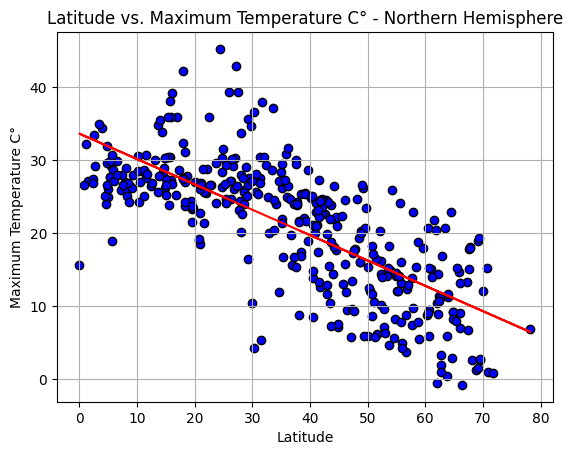

In [21]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Linear regression on Southern Hemisphere

Linear equation: y = 0.48x + 31.94
The r-value is: 0.7588045762991323


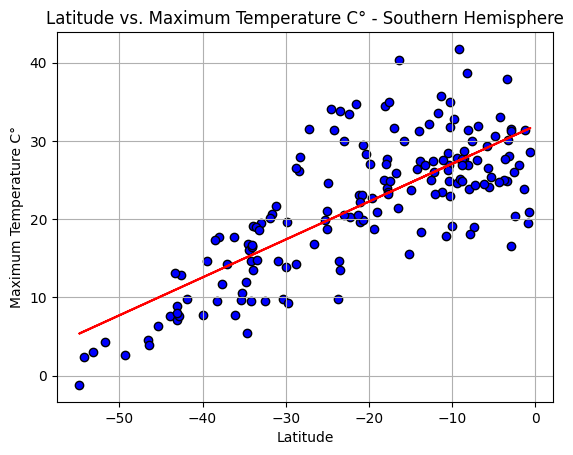

In [22]:
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Discussion about the linear relationship: YOUR RESPONSE HERE

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -0.0x + 67.56
The r-value is: -0.003732784917310066


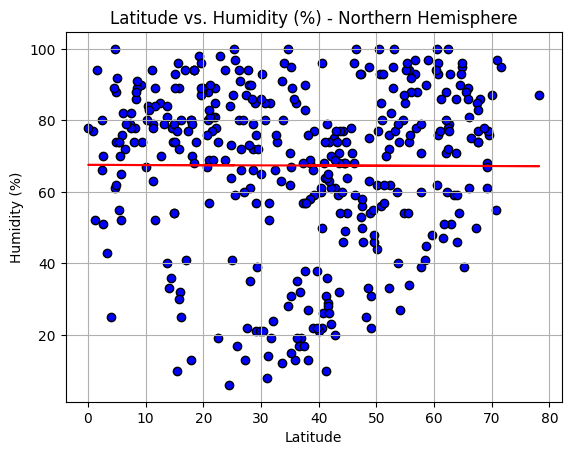

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.27x + 58.34
The r-value is: -0.1402846151034947


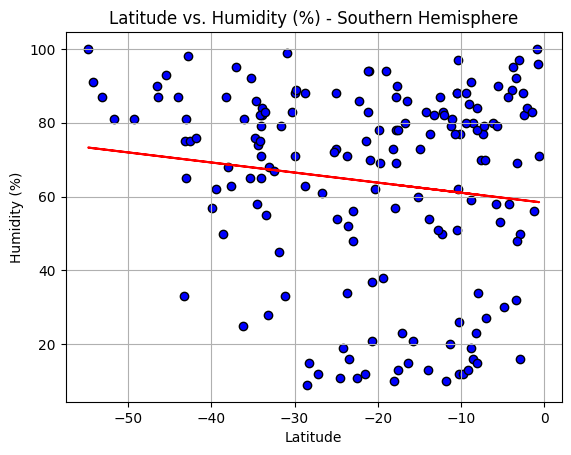

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Discussion about the linear relationship: YOUR RESPONSE HERE

1.The linear regression analysis in this graph indicates that latitude does not have a strong influence on humidity levels in the Northern Hemisphere within this dataset. This challenges the assumption that humidity would change consistently with latitude.

2.The linear regression analysis in this graph indicates a weak negative correlation between latitude and humidity in the Southern Hemisphere. This means that as latitude decreases (moving towards the equator), humidity tends to decrease slightly.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = -0.19x + 62.15
The r-value is: -0.08633888942916627


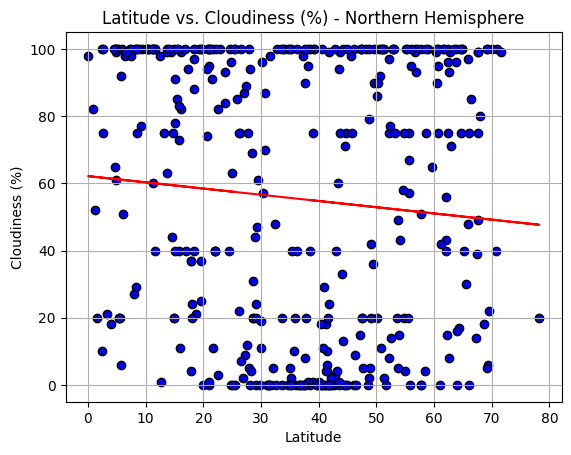

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.04x + 42.69
The r-value is: -0.013951760024623895


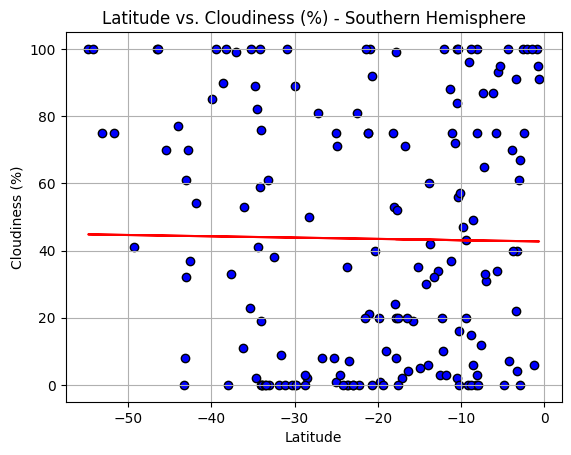

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### **Discussion about the linear relationship:** YOUR RESPONSE HERE

1.The linear regression analysis in the Northern Hemisphere graph indicates a low correlation between latitude and cloudiness . This means that as latitude increases, cloudiness levels do not consistently increase or decrease.

 
2.There is little to no relationship between latitude and cloudiness based on the data available. The r-value is low for Southeren hemisphere and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.0x + 3.53
The r-value is: 0.019581779870745095


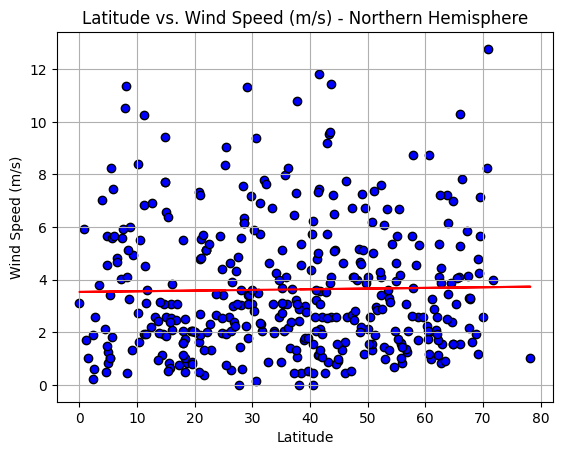

In [27]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.03x + 3.95
The r-value is: -0.14552130174993544


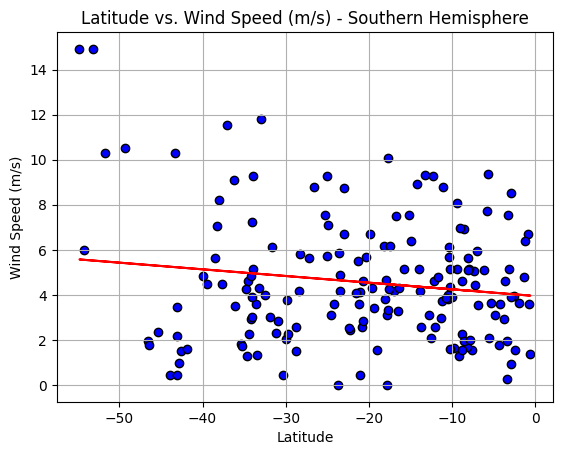

In [28]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

 ### Discussion about the linear relationship: YOUR RESPONSE HERE ###

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.